# 1. Import all needed libraries

In [1]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt 
import os
import numpy as np
from scipy.stats.stats import spearmanr

# 2. Change the working directory

In [2]:
os.chdir('/Users/neda/Dropbox (PopGen)/tmp/egg_size_method_paper/scripts/')
os.getcwd()

'/Users/neda/Dropbox (PopGen)/tmp/egg_size_method_paper/scripts'

# 3. Functions

In [3]:
#this function computes percentage sort recovery which is the percentage of objects that were sorted and dispensed
#as a fraction of all the objects fulfilling sorting criteria, i.e. size
def compute_sort_recovery(data):
    #make a dataset of sorted objects
    data_srt = data.loc[data['Sorted status'] == 6]
    #determine the region of sorted objects
    region = list(set(data_srt['In Regions']))
    #compute the number of objects in this region
    num_egg_gate = len(data[data['In Regions'].isin(region)])
    #compute the number of sorted objects
    num_egg_sort = len(data_srt)
    #compute sort recovery percentage
    data_srtrec = num_egg_sort/num_egg_gate*100  
    #compute sorting time, the time is in millisecond so it will be converted to minute
    srt_time= (max(data['Time'])-min(data['Time']))/60000
    return(num_egg_sort, num_egg_gate, data_srtrec, srt_time)

#this function sets the color of fliers for boxplots
def set_color_flier(col):
    flierprops = dict( marker = '.',color = col, markerfacecolor = col, markeredgecolor = col, markersize =3)   
    return flierprops

#this function sets the color of boxes and whiskers for boxplots
def set_color_box(col):    
    colors=[ col] * 100
    fullset_color_box = colors
    fullset_color_whisker = [ col] * 80
    for patch, col in zip(box['boxes'], fullset_color_box):
        patch.set_facecolor(col)
        patch.set_edgecolor(col)
    for patch, col in zip(box['whiskers'], fullset_color_whisker):
        patch.set_color(col)
        patch.set_linestyle('-')


# 4. Computation of sort recovery

## 4.1 Input file

### The biosorter summary files are needed. Note that for this analysis the original Biosorter data is copied to an Excel file.

### A total of 8 datasets have been used for each gate category: R10R11 (200-400 μm), R12 (400-500 μm), R13plus (> 500 μm) and R19 (200 to >500 μm)

In [4]:
R10R11_1 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_L1_R10R11')
R10R11_2 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_L2_R10R11')
R10R11_3 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_L3_R10R11')
R10R11_4 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run10_L1_R10R11')
R10R11_5 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run10_L2_R10R11')
R10R11_6 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run10_L3_R10R11')
R10R11_7 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run12_L2_R10R11')
R10R11_8 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run12_L3_R10R11')

R12_1 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run5_L1_R12')
R12_2 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run5_L2_R12')
R12_3 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run5_L3_R12')
R12_4 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run7_L1_R12')
R12_5 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run7_L2_R12')
R12_6 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run7_L3_R12')
R12_7 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_L1_R12')
R12_8 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_L2_R12')

R13p_1 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_L1_R13+')
R13p_2 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_L2_R13+')
R13p_3 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_L3_R13+')
R13p_4 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run10_L1_R13+')
R13p_5 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run10_L2_R13+')
R13p_6 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run10_L3_R13+')
R13p_7 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run12_L1_R13+')
R13p_8 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run12_L2_R13+')

R19_1 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run5_C1_R19')
R19_2 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run5_C2_R19')
R19_3 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run5_C3_R19')
R19_4 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run7_C1_R19')
R19_5 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run7_C2_R19')
R19_6 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run7_C3_R19')
R19_7 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_C1_R19')
R19_8 = pd.read_excel('../data/sort_recovery_data.xlsx', sheet_name='run8.5_C2_R19')

## 4.2 Computation of sort recovery percentage

### The output data for each dataset contains the number of sorted eggs, total number of eggs in the sorted gate, sort recovery and sort time.

In [5]:
all_data_srt_rec = [compute_sort_recovery(i) for i in [
    R10R11_1, R10R11_2, R10R11_3,R10R11_4, R10R11_5, R10R11_6, R10R11_7, R10R11_8,
    R12_1, R12_2, R12_3,R12_4, R12_5, R12_6, R12_7, R12_8,
    R13p_1, R13p_2, R13p_3,R13p_4, R13p_5, R13p_6, R13p_7, R13p_8,
    R19_1, R19_2, R19_3,R19_4, R19_5, R19_6, R19_7, R19_8]]

## 4.3 Data visualization

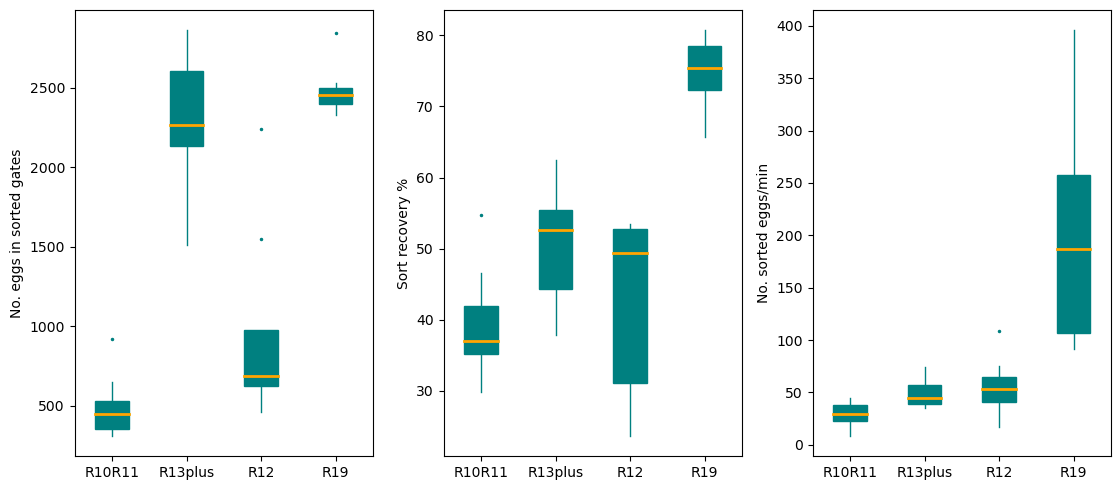

In [6]:
#we index all_data_srt_rec list to divide it based on the gate
datasets = [all_data_srt_rec[:8], all_data_srt_rec[8:16],all_data_srt_rec[16:24], all_data_srt_rec[24:]]
labels_gate = ['R10R11', 'R13plus', 'R12', 'R19']

fig , ax = plt.subplots(nrows = 1, ncols = 3, sharex=True, sharey=True,figsize=(15,5),dpi=100, facecolor='w', edgecolor='k')    
ax=plt.subplot(1,4,1)
set_color_flier('teal')
box=ax.boxplot([[item[1] for item in st] for st in datasets], medianprops = dict(color="orange",linewidth=2), vert = True,showcaps = False, showfliers = True, patch_artist=True, flierprops=set_color_flier('teal'))
set_color_box('teal')
plt.ylabel('No. eggs in sorted gates')
plt.xticks(range(1,5),labels_gate,fontsize=12, va='top')
plt.xticks(fontsize=10, va='top')
ax=plt.subplot(1,4,2)
set_color_flier('teal')
box=ax.boxplot([[item[2] for item in st] for st in datasets], medianprops = dict(color="orange",linewidth=2), vert = True,showcaps = False, showfliers = True, patch_artist=True, flierprops=set_color_flier('teal'))
set_color_box('teal')
plt.ylabel('Sort recovery %')
plt.xticks(range(1,5),labels_gate,fontsize=12, va='top')
plt.xticks(fontsize=10, va='top')
ax=plt.subplot(1,4,3)
set_color_flier('teal')
box=ax.boxplot([[item[0]/item[3] for item in st] for st in datasets], medianprops = dict(color="orange",linewidth=2), vert = True,showcaps = False, showfliers = True, patch_artist=True, flierprops=set_color_flier('teal'))
set_color_box('teal')
plt.ylabel('No. sorted eggs/min')
plt.xticks(range(1,5),labels_gate,fontsize=12, va='top')
plt.xticks(fontsize=10, va='top')
fig.tight_layout()
plt.savefig('../plots/final_plots/sort_speed.jpeg', dpi=100,format='jpeg', bbox_inches = 'tight')
plt.savefig('../plots/final_plots/sort_speed.svg', dpi=100,format='svg', bbox_inches = 'tight')



### We check the correlation between the percentage of sort recovery and the number of available eggs in sorted gates. 

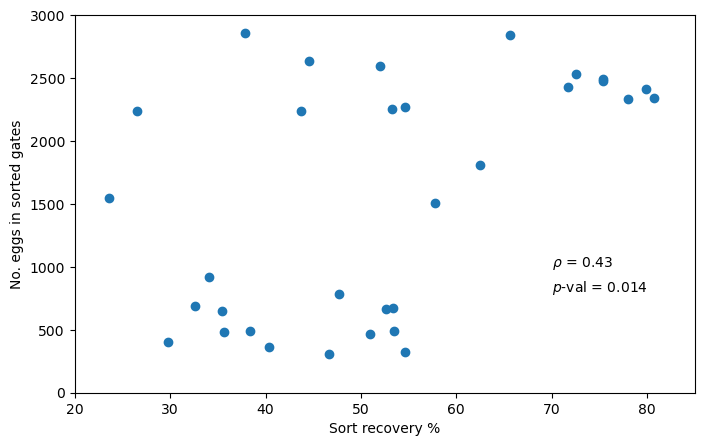

In [7]:
fig , ax = plt.subplots(sharex=True, sharey=True,figsize=(8,5),dpi=100, facecolor='w', edgecolor='k')    
plt.scatter([i[2] for i in all_data_srt_rec],[i[1] for i in all_data_srt_rec])
plt.xlim(20,85)
plt.ylim(0,3000)
plt.annotate(r'$\rho$ = %.2f'%(np.round(spearmanr([i[2] for i in all_data_srt_rec],[i[1] for i in all_data_srt_rec])[0],3)), xy=(70,1000))
plt.annotate('$\it{p}$-val = %.3f'%(np.round(spearmanr([i[2] for i in all_data_srt_rec],[i[1] for i in all_data_srt_rec])[1],3)), xy=(70,800))
plt.xlabel('Sort recovery %')
plt.ylabel('No. eggs in sorted gates')
plt.savefig('../plots/final_plots/sort_recovery_egg_cor.jpeg', dpi=100,format='jpeg', bbox_inches = 'tight')
plt.savefig('../plots/final_plots/sort_recovery_egg_cor.svg', dpi=100,format='svg', bbox_inches = 'tight')


In [8]:
spearmanr([i[2] for i in all_data_srt_rec],[i[1] for i in all_data_srt_rec])

SpearmanrResult(correlation=0.4298414462191934, pvalue=0.014074458717694114)

## 4.2 Summary statistics for sort recovery

### Compute the mean and median of Sort recovery % in different gates: R10R11 (200-400 μm), R12 (400-500 μm), R13plus (> 500 μm) and R19 (200 to >500 μm).

In [9]:
[np.mean([item[2] for item in st]) for st in datasets]

[39.37059226855878, 50.78634490216618, 42.61319333139052, 74.91169469952008]

In [10]:
[np.median([item[2] for item in st]) for st in datasets]

[37.01872501577951, 52.661659202633466, 49.310611694901766, 75.36196813971652]

### Compute the mean and median of No. sorted eggs/min in different gates: R10R11 (200-400 μm), R12 (400-500 μm), R13plus (> 500 μm) and R19 (200 to >500 μm).

In [11]:
[np.mean([item[0]/item[3] for item in st]) for st in datasets]

[28.104157545045744, 49.73618291839914, 55.42307841302339, 204.8679117754864]

In [12]:
[np.median([item[0]/item[3] for item in st]) for st in datasets]

[29.068746581317722, 44.55224495153628, 53.323726189182636, 187.1374416889255]